<a href="https://colab.research.google.com/github/bbnaik2003/MiniProjectTripit/blob/main/Copy_of_Signature_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
divyanshrai_handwritten_signatures_path = kagglehub.dataset_download('divyanshrai/handwritten-signatures')
tienen_handwritten_signature_verification_path = kagglehub.dataset_download('tienen/handwritten-signature-verification')

print('Data source import complete.')


100%|██████████| 2.10G/2.10G [00:29<00:00, 77.2MB/s]

Extracting files...


Data source import complete.


# CONVOLUTIONAL NEURAL NETWORK MODEL

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define input shape for the network
input_shape = (224, 224, 3)

# create a sequential model
model = Sequential()

# add convolutional layers with pooling and dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# flatten the output and add dense layers with dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
!ls /kaggle/input/handwritten-signature-verification/

ls: cannot access '/kaggle/input/handwritten-signature-verification/': No such file or directory


In [19]:
!ls /kaggle/input/

handwritten-signatures


In [20]:
real_dir = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real'
forged_dir = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge'

In [21]:
import glob

real_dir = glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*')
forged_dir = glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*')

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Update these paths to the actual location of your extracted data**
real_dir = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real'
forged_dir = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge'
# Ensure the directories exist before proceeding
import os

if not os.path.exists(real_dir):
    raise FileNotFoundError(f"Directory not found: {real_dir}. Please check the path and ensure the data is extracted correctly.")

if not os.path.exists(forged_dir):
    raise FileNotFoundError(f"Directory not found: {forged_dir}. Please check the path and ensure the data is extracted correctly.")

# ... (rest of the code remains the same)
# Create an ImageDataGenerator with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create an ImageDataGenerator without augmentation for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create flow generators for the training and validation data
train_generator = train_datagen.flow_from_directory(
    real_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    forged_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Update these paths to the actual location of your extracted data**
real_dir = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real'
forged_dir = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge'

# Ensure the directories exist before proceeding
import os

if not os.path.exists(real_dir):
    raise FileNotFoundError(f"Directory not found: {real_dir}. Please check the path and ensure the data is extracted correctly.")

if not os.path.exists(forged_dir):
    raise FileNotFoundError(f"Directory not found: {forged_dir}. Please check the path and ensure the data is extracted correctly.")


# Create an ImageDataGenerator with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create an ImageDataGenerator without augmentation for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create flow generators for the training and validation data
train_generator = train_datagen.flow_from_directory(
    os.path.dirname(real_dir), # Use the parent directory
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='training') # Add subset argument for training data


val_generator = val_datagen.flow_from_directory(
    os.path.dirname(real_dir), # Use the parent directory
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation') # Add subset argument for validation data

Found 120 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the paths to the real and forged signature images
# Updated path to reflect the correct location within the dataset
real_path = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real'
forged_path = '/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge'

# Load the real signature images
real_images = []
for filename in os.listdir(real_path):
    image = cv2.imread(os.path.join(real_path, filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        real_images.append(image)

# Load the forged signature images
forged_images = []
for filename in os.listdir(forged_path):
    image = cv2.imread(os.path.join(forged_path, filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        forged_images.append(image)

# Convert the images to numpy arrays
real_images = np.array(real_images)
forged_images = np.array(forged_images)

# Create the labels (0 for real, 1 for forged)
real_labels = np.zeros((real_images.shape[0], 1))
forged_labels = np.ones((forged_images.shape[0], 1))

# Concatenate the real and forged images and labels
images = np.concatenate((real_images, forged_images))
labels = np.concatenate((real_labels, forged_labels))

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images.reshape((-1, 224, 224, 1)), train_labels, batch_size=32, epochs=10, validation_data=(val_images.reshape((-1, 224, 224, 1)), val_labels))

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_images.reshape((-1, 224, 224, 1)), val_labels)
print('Validation accuracy:', accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3711 - loss: 1633.0277 - val_accuracy: 0.4583 - val_loss: 411.1760
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5430 - loss: 266.0212 - val_accuracy: 0.5417 - val_loss: 36.9894
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.4388 - loss: 51.3610 - val_accuracy: 0.4583 - val_loss: 12.6693
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5573 - loss: 26.3664 - val_accuracy: 0.4583 - val_loss: 16.2501
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4414 - loss: 12.7353 - val_accuracy: 0.4583 - val_loss: 10.7513
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5286 - loss: 10.3552 - val_accuracy: 0.4583 - val_loss: 1.6735
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.5234 - loss: 2.2228 - val_accuracy: 0.5417 - val_loss: 1.6884
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5091 - loss: 4.2707 - val_accuracy: 0.5417 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4583 - loss: 0.7289
Validation accuracy: 0.4583333432674408
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.6979 - loss: 0.6050 - val_accuracy: 0.5417 - val_loss: 1.9663
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6992 - loss: 1.1319 - val_accuracy: 0.4167 - val_loss: 0.7018
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7070 - loss: 0.6387 - val_accuracy: 0.3750 - val_loss: 0.7030
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9193 - loss: 0.6244 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9557 - loss: 0.5776 - val_accuracy: 0.6667 - val_loss: 0.6796
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8281 - loss: 2.5474 - val_accuracy: 0.4583 - val_loss: 3.3525
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.5911 - loss: 1.5540 - val_accuracy: 0.6667 - val_loss: 0.6771
Epoch 8/10
3/3 ━━━━━━━

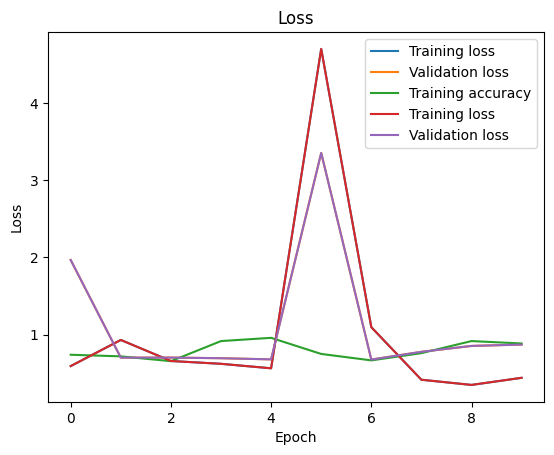

In [29]:
import matplotlib.pyplot as plt
import tensorflow as tf
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_images.reshape((-1, 224, 224, 1)), val_labels)
print('Validation accuracy:', val_acc)

# Assuming 'model' is your trained Keras model
# Assign the result of `model.fit` to the `history` variable
history = model.fit(train_images.reshape((-1, 224, 224, 1)), train_labels, batch_size=32, epochs=10, validation_data=(val_images.reshape((-1, 224, 224, 1)), val_labels))


# Plot the loss and accuracy over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

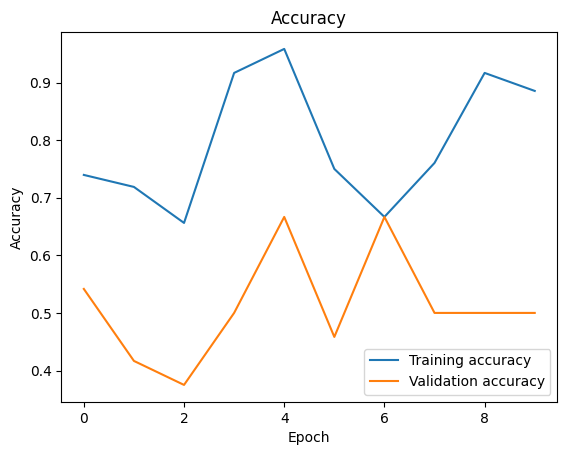

In [30]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# SIAMESE NEURAL NETWORK MODEL

* Distance : Euclidean
* Activation : Sigmoid

Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_46      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_59       │ (None, 128)       │  5,328,800 │ input_layer_45[0… │
│ (Functional)        │                   │            │ input_layer_46[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_14 (Lambda)  │ (None, 128)       │          0 │ functional_59[0]… │
│                     │                   │            │ functional_59[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 2)         │        258 │ lambda_14[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,329,058 (20.33 MB)

 Trainable params: 5,329,058 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5611 - loss: 2.2292 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4715 - loss: 1.1647 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6234 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4780 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4536 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5179 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4727 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3911 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/s

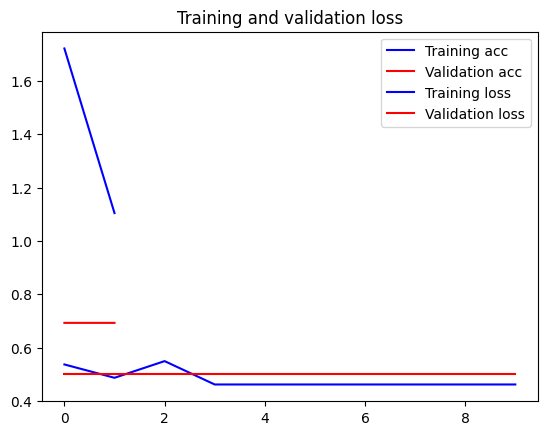

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [45]:
import cv2
import glob
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
from tensorflow import keras # Import tensorflow.keras
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt


gen = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]

forg = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0

for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]), output_shape=(128,))([output1, output2])

prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

siamese_network.summary()



# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# ... (previous code)

# Define the distance metric function using Euclidean distance
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    # Use keras.backend.square for compatibility with TensorFlow backend
    squared_diff = keras.backend.square(featsA - featsB)
    return keras.backend.sqrt(keras.backend.sum(squared_diff, axis=1, keepdims=True))

# ... (rest of your code)
# Specify the output_shape argument for the Lambda layer
distance = Lambda(euclidean_distance, output_shape=(1,))([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# ... (rest of the code)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.figure()


In [48]:
import cv2
import glob
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
from tensorflow import keras # Import tensorflow.keras
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt


gen = [glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]

forg = [glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/kaggle/input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            # Check if the image was loaded successfully
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                test_data.append(image)
                test_labels.append(0)
            else:
                print(f"Failed to load image: {i}")  # Print an error message if loading fails
        else:
            image = cv2.imread(i)
            # Check if the image was loaded successfully
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                train_data.append(image)
                train_labels.append(0) #genuine = 0
            else:
                print(f"Failed to load image: {i}")  # Print an error message if loading fails

for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            # Check if the image was loaded successfully
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                test_data.append(image)
                test_labels.append(1)
            else:
                print(f"Failed to load image: {j}")  # Print an error message if loading fails
        else:
            image = cv2.imread(j)
            # Check if the image was loaded successfully
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                train_data.append(image)
                train_labels.append(1) #forged = 1
            else:
                print(f"Failed to load image: {j}")  # Print an error message if loading fails

In [50]:
import numpy as np

# ... (your existing code for loading and preprocessing images) ...

# Convert test_data to a NumPy array and ensure it has the correct shape
test_data = np.array(test_data)
# Reshape if necessary, assuming your images are RGB
if test_data.shape[-1] != 3:  # If the last dimension is not 3 (RGB)
    test_data = test_data.reshape((*test_data.shape, 1)) # Add a channel dimension if not present
    test_data = np.repeat(test_data, 3, axis=-1)  # Repeat the channel to create RGB


pred = convnet.predict(test_data)
pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 642ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

# CONVOLUTIONAL SIAMESE NEURAL NETWORK MODEL

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.3243 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.4476 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5023 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4259 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5031 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4519 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5109 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4684 - loss: nan - val_accuracy: 0.4500 - val_loss: nan
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accura

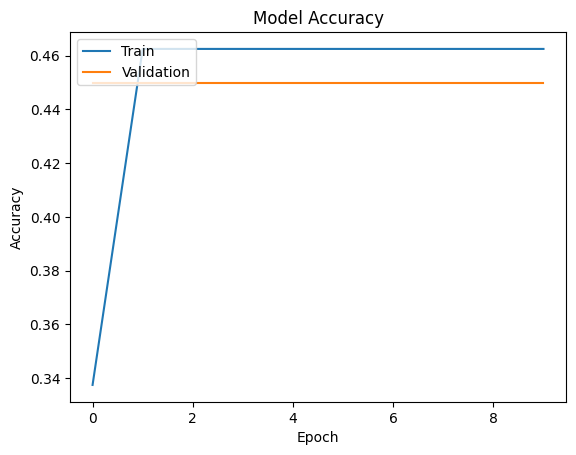

Final Training Accuracy: 46.25%
Final Validation Accuracy: 45.00%
Training accuracy: 0.4625000059604645
Validation accuracy: 0.44999998807907104


In [56]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
from keras.models import Model, Sequential
import tensorflow as tf # Import tensorflow
import numpy as np

# Define the input shape for the network
input_shape = (224, 224, 3)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# Create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric function using Euclidean distance
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    # Use tf.math.square and tf.math.sqrt for compatibility
    squared_diff = tf.math.square(featsA - featsB)
    return tf.math.sqrt(tf.math.reduce_sum(squared_diff, axis=1, keepdims=True))

# Define the output layer
# Specify the output_shape argument for the Lambda layer
distance = Lambda(euclidean_distance, output_shape=(1,))([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# Create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# Train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the final training and validation accuracy
print("Final Training Accuracy: {:.2f}%".format(history.history['accuracy'][-1]*100))
print("Final Validation Accuracy: {:.2f}%".format(history.history['val_accuracy'][-1]*100))
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])